In [1]:
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metric_bundles as mb
from rubin_sim.maf.batches.col_map_dict import col_map_dict

In [2]:
filename = 'ddf_split_v3.1_1yrs.db'
run_name = filename.replace('.db', '')


In [3]:
bundle_list = []
nyears=10
years = list(range(nyears + 1))
for year in years[1:]:
    sqlconstraint = "night > %i and night <= %i and note like '%%DD%%'" % (
            365.25 * (year - 1),
            365.25 * year,
        )
    
    slicer = slicers.HourglassSlicer()
    metric = metrics.HourglassMetric(
     metric_name="Hourglass"
        )
    bundle = mb.MetricBundle(
            metric,
            slicer,
            constraint=sqlconstraint
        )
    bundle_list.append(bundle)

In [4]:
bd = mb.make_bundles_dict_from_list(bundle_list)
mbg = mb.MetricBundleGroup(bd, filename)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metric_bundles/metric_bundle_group.py:291: UserWarning: No data matching constraint night > 3287 and night <= 3652 and note like '%DD%'
  warnings.warn("No data matching constraint %s" % constraint)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metric_bundles/metric_bundle_group.py:298: UserWarning:  This means skipping metrics ['Hourglass : night > 3287 and night < 3652 and note like %DD% : HourglassSlicer']
  warnings.warn(" This means skipping metrics %s" % metrics_skipped)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metric_bundles/metric_bundle_group.py:291: UserWarning: No data matching constraint night > 2191 and night <= 2556 and note like '%DD%'
  warnings.warn("No data matching constraint %s" % constraint)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metric_bundles/metric_bundle_group.py:298: UserWarning:  This means skipping metrics ['Hourglass : night > 2191 and night < 2556 and note like %DD% : HourglassSlicer']
 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

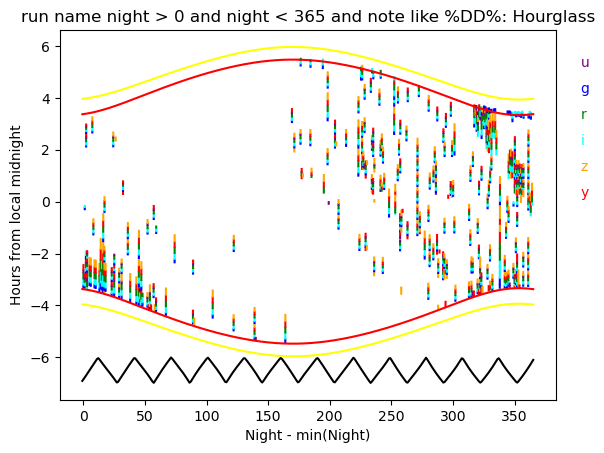

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
mbg.run_all()
mbg.plot_all(closefigs=False)